## Machine Learning Online Class

Exercise 7 | Principle Component Analysis and K-Means Clustering

Instructions

------------

  This file contains code that helps you get started on the
  exercise. You will need to complete the following functions:

     pca.m
     projectData.m
     recoverData.m
     computeCentroids.m
     findClosestCentroids.m
     kMeansInitCentroids.m

  For this exercise, you will not need to change any code in this file,
  or any other files other than those mentioned above.

In [1]:
import sys
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io
sys.path.append('../')
from ex7.featureNormalize import featureNormalize
from ex7.pca import pca
from ex7.drawLine import drawLine
from ex7.projectData import projectData
from ex7.recoverData import recoverData
from ex7.displayData import displayData
from ex7.plotDataPoints import plotDataPoints

Visualizing example dataset for PCA.



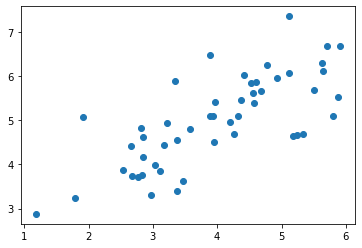

In [2]:
## ================== Part 1: Load Example Dataset  ===================
#  We start this exercise by using a small dataset that is easily to visualize

print('Visualizing example dataset for PCA.\n')

#  The following command loads the dataset. You should now have the
#  variable X in your environment
data = loadmat('./data/ex7data1.mat')
X = data['X']
#  Visualize the example dataset
plt.scatter(X[:, 0], X[:, 1])
plt.show()


Running PCA on example dataset.

Top eigenvector: 
[-0.707107 -0.707107]

(you should expect to see -0.707107 -0.707107)


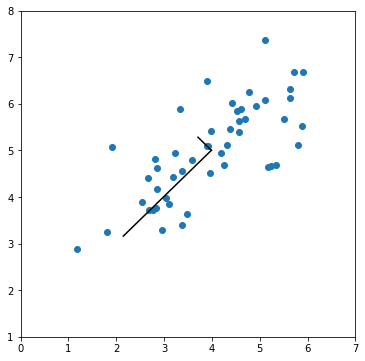

In [3]:
# =============== Part 2: Principal Component Analysis ===============
#  You should now implement PCA, a dimension reduction technique. You
#  should complete the code in pca.m
#
print('\nRunning PCA on example dataset.\n')

#  Before running PCA, it is important to first normalize X
X_norm, mu, sigma = featureNormalize(X)

#  Run PCA
U, S = pca(X_norm)

#  Compute mu, the mean of the each feature

#  Draw the eigenvectors centered at mean of data. These lines show the
#  directions of maximum variations in the dataset.
fig = plt.figure(figsize=(6, 6))
plt.axis([0, 7, 1, 8])
plt.scatter(X[:, 0], X[:, 1])
drawLine(mu, mu + 1.5 * S[0] * U[:, 0], plt)
drawLine(mu, mu + 1.5 * S[1] * U[:, 1], plt)

print('Top eigenvector: ')
print(np.around(U[:, 0], decimals=6))
print('\n(you should expect to see -0.707107 -0.707107)')

plt.show()


Dimension reduction on example dataset.



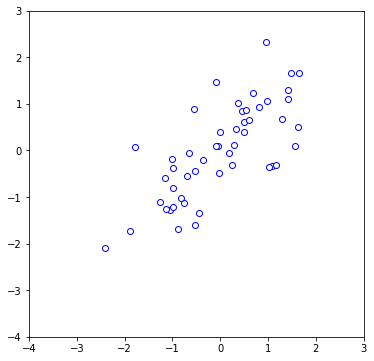

In [4]:
## =================== Part 3: Dimension Reduction ===================
#  You should now implement the projection step to map the data onto the
#  first k eigenvectors. The code will then plot the data in this reduced
#  dimensional space.  This will show you what the data looks like when
#  using only the corresponding eigenvectors to reconstruct it.
#
#  You should complete the code in projectData.m

print('\nDimension reduction on example dataset.\n')

#  Plot the normalized dataset (returned from pca)
fig = plt.figure(figsize=(6, 6))
plt.axis([-4, 3, -4, 3])
plt.scatter(X_norm[:, 0], X_norm[:, 1], marker='o', c='w', edgecolors='b')
plt.show()

Projection of the first example: 1.496313

(this value should be about 1.481274)

Approximation of the first example: -1.058053 -1.058053

(this value should be about  -1.047419 -1.047419)

这里和答案相差不大即可，毕竟是"about"嘛，可以理解


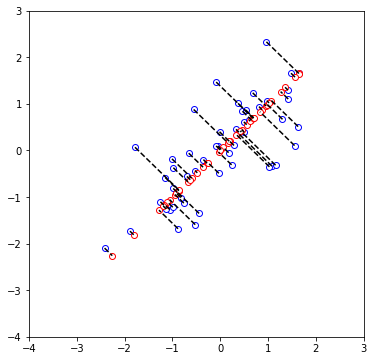

In [5]:
#  Project the data onto K = 1 dimension
K = 1
Z = projectData(X_norm, U, K)
print('Projection of the first example: %f' % Z[0])
print('\n(this value should be about 1.481274)\n')

X_rec = recoverData(Z, U, K)
print('Approximation of the first example: %f %f' % (X_rec[0, 0], X_rec[0, 1]))
print('\n(this value should be about  -1.047419 -1.047419)\n')

print('这里和答案相差不大即可，毕竟是"about"嘛，可以理解')

#  Draw lines connecting the projected points to the original points
fig = plt.figure(figsize=(6, 6))
plt.axis([-4, 3, -4, 3])
plt.scatter(X_norm[:, 0], X_norm[:, 1], marker='o', c='w', edgecolors='b')
plt.scatter(X_rec[:, 0], X_rec[:, 1], marker='o', c='w', edgecolors='r')
for i in range(X_norm.shape[0]):
    drawLine(X_norm[i, :], X_rec[i, :], plt, 'k--')
plt.show()


Loading face dataset.



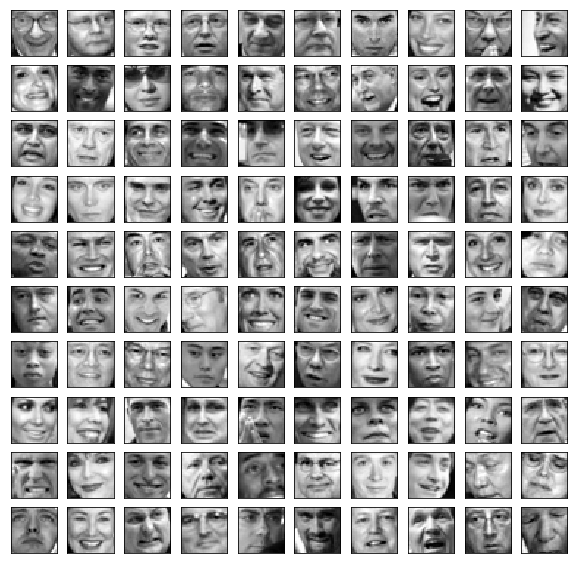

In [6]:
## =============== Part 4: Loading and Visualizing Face Data =============
#  We start the exercise by first loading and visualizing the dataset.
#  The following code will load the dataset into your environment

print('\nLoading face dataset.\n')

#  Load Face dataset
data = loadmat('./data/ex7faces.mat')
X = data['X']
#  Display the first 100 faces in the dataset
displayData(X[0:100, :])


Running PCA on face dataset.
(this might take a minute or two ...)



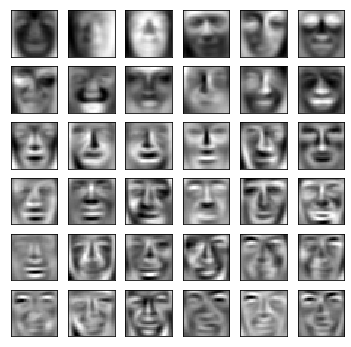

In [7]:
## =========== Part 5: PCA on Face Data: Eigenfaces  ===================
#  Run PCA and visualize the eigenvectors which are in this case eigenfaces
#  We display the first 36 eigenfaces.

print('\nRunning PCA on face dataset.')
print('(this might take a minute or two ...)\n')

#  Before running PCA, it is important to first normalize X by subtracting
#  the mean value from each feature
X_norm, mu, sigma = featureNormalize(X)

#  Run PCA
U, S = pca(X_norm)

#  Visualize the top 36 eigenvectors found
displayData(U[:, 0:36].T)

In [8]:
# ============= Part 6: Dimension Reduction for Faces =================
#  Project images to the eigen space using the top k eigenvectors
#  If you are applying a machine learning algorithm
print('\nDimension reduction for face dataset.\n')

K = 100
Z = projectData(X_norm, U, K)

print('The projected data Z has a size of: ')
print(Z.shape)


Dimension reduction for face dataset.

The projected data Z has a size of: 
(5000, 100)



Visualizing the projected (reduced dimension) faces.



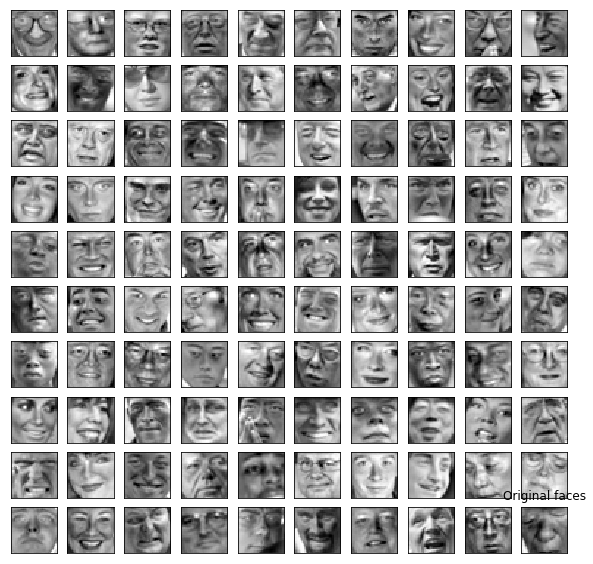

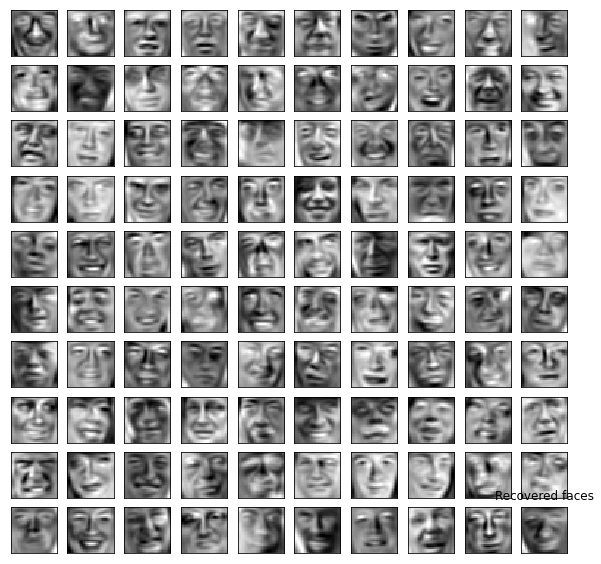

In [9]:
# ==== Part 7: Visualization of Faces after PCA Dimension Reduction ====
#  Project images to the eigen space using the top K eigen vectors and
#  visualize only using those K dimensions
#  Compare to the original input, which is also displayed

print('\nVisualizing the projected (reduced dimension) faces.\n')

K = 100
X_rec = recoverData(Z, U, K)

# Display normalized data
displayData(X_norm[0:100, :])
plt.title('Original faces')
plt.show()

# Display reconstructed data from only k eigenfaces
displayData(X_rec[0:100, :])
plt.title('Recovered faces')
plt.show()

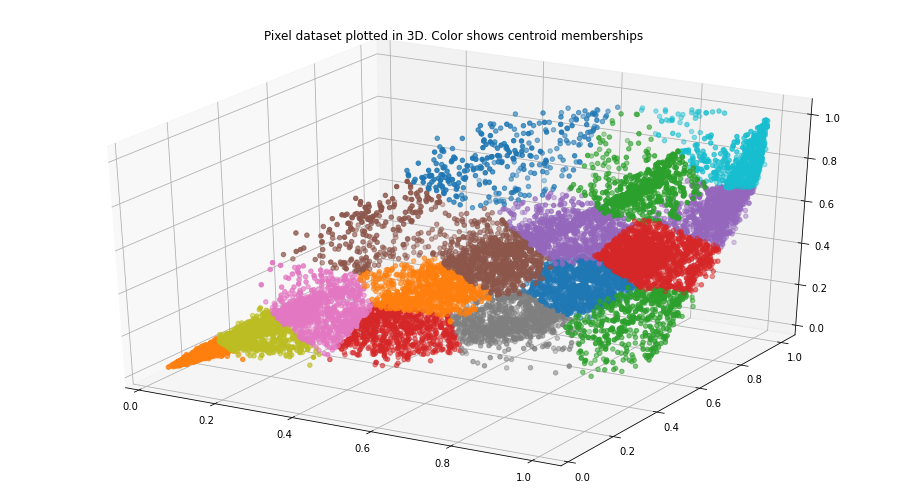

In [10]:
## === Part 8(a): Optional (ungraded) Exercise: PCA for Visualization ===
#  One useful application of PCA is to use it to visualize high-dimensional
#  data. In the last K-Means exercise you ran K-Means on 3-dimensional 
#  pixel colors of an image. We first visualize this output in 3D, and then
#  apply PCA to obtain a visualization in 2D.


# Reload the image from the previous exercise and run K-Means on it
# For this to work, you need to complete the K-Means assignment first
A = io.imread('./data/bird_small.png') / 255

# If imread does not work for you, you can try instead
#   loadmat('./data/bird_small.mat');

img_size = A.shape
X = np.reshape(A, (img_size[0] * img_size[1], 3))
K = 16
max_iters = 10

model = KMeans(n_clusters=K, n_init=max_iters)  # 设计模型
model.fit(X)  # 训练数据
centroids = model.cluster_centers_  # 获取聚类中心
idx = model.predict(X)  # 根据源数据，将同一个类的点归属为同一种颜色（聚类中心）
compressed_pic = centroids[idx].reshape((128, 128, 3))  # 展开为原来的图片尺寸
plt.figure(figsize=(16,9))
ax = plt.subplot(111, projection='3d')
for i in range(K):
    x = X[np.where(idx == i)[0], :]
    ax.scatter(x[:, 0], x[:, 1], x[:,2])
ax.set_title('Pixel dataset plotted in 3D. Color shows centroid memberships')
plt.show()

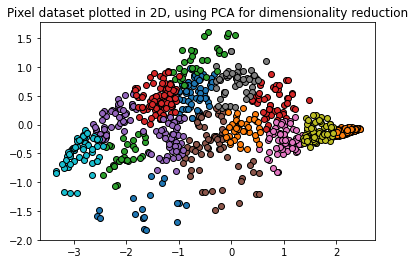

In [11]:
## === Part 8(b): Optional (ungraded) Exercise: PCA for Visualization ===
# Use PCA to project this cloud to 2D for visualization

# Subtract the mean to use PCA
X_norm, mu, sigma = featureNormalize(X)

# PCA and project the data to 2D
U, S = pca(X_norm)
Z = projectData(X_norm, U, 2)

# Plot in 2D=

sel = np.floor(np.random.rand(1000, 1) * X.shape[0]).astype(int)
plotDataPoints(Z[sel, :].reshape(-1, 2), idx[sel], K, plt)
plt.title(
    'Pixel dataset plotted in 2D, using PCA for dimensionality reduction')
plt.show()

一点小小的遗憾，就是投影之后的颜色和原来的不匹配，这个的解决办法是把一堆颜色放在一个list里，根据类别选颜色，要是个位数还好，可是这个16种...我累了